# Remote Work: A closer Overview

### In this notebook since our data is categorical, I decided to go deeper and look at each question seperatly using bar charts. 
### The purpose of this is to thourougly map out the data visually to see what stands out and what I would like to work on in the future.

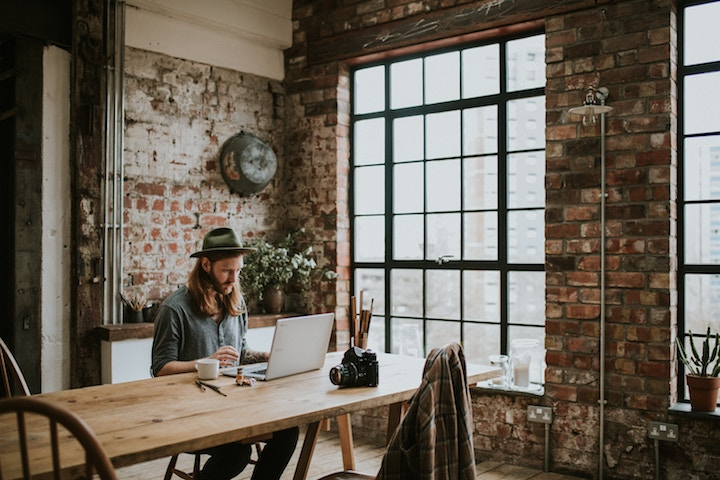

In [1]:
from IPython.display import Image
Image(filename="Images/remote-work.jpg", width=600, height=1000)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/David/miniconda3/envs/MrLapin/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/David/miniconda3/envs/MrLapin/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/David/miniconda3/envs/MrLapin/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/David/miniconda3/envs/MrLapin/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
# Reading CSV File
file = pd.read_csv("DATA/RemoteWork.csv")

In [4]:
RWY = pd.DataFrame(file)

In [5]:
print("----- SHAPE -----")
print(RWY.shape)
print("----- DTYPES -----")
print(RWY.dtypes)
print("----- NAN -----")
print(RWY.isnull().sum(axis=0))

----- SHAPE -----
(374, 25)
----- DTYPES -----
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
age_range                    object
dtype: object
----- NAN -----
Age                    

In [6]:
# Replacing nan in state to NS = Not US State
RWY['state'] = RWY['state'].replace(np.nan, "NS")

In [30]:
RWY.drop(['age_range'], axis=1).head()

,Age,Gender,Country,state,self_employed,family_history,treatment,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,31,Male,United States,TX,NaN,No,No,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No
1,35,Female,United States,MI,NaN,Yes,Yes,1-5,Yes,Yes,...,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No
2,39,Male,Canada,NS,NaN,No,No,1-5,Yes,Yes,...,Yes,Don't know,No,No,No,No,No,No,No,No
3,31,Male,United States,OH,NaN,No,Yes,6-25,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
4,29,Male,Bulgaria,NS,NaN,No,No,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Yes,Yes,Yes,Yes,Don't know,No


In [8]:
# There should no Nan's but checking just in case. 
print("----- NAN -----")
print(RWY.isnull().sum(axis=0))

----- NAN -----
Age                          0
Gender                       0
Country                      0
state                        0
self_employed                6
family_history               0
treatment                    0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
age_range                    0
dtype: int64


## Diving Deeper into the Data

### Age discription and distribution of remote worker

Mean age is 33


count    374.000000
mean      33.703209
std        7.967100
min       18.000000
25%       28.000000
50%       33.000000
75%       38.000000
max       72.000000
Name: Age, dtype: float64


/Users/David/miniconda3/envs/MrLapin/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


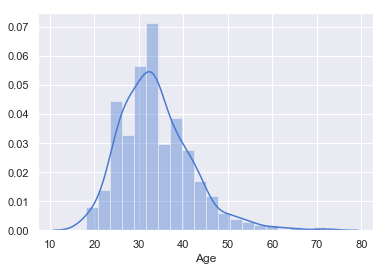

In [9]:
# Plot a histogram of the respondents' ages

sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

sns.distplot(RWY["Age"].dropna());

print("")
print(RWY["Age"].describe())

### - Gender

Not surprised by gender. According to forbes(1) and other sources Only 25% of IT jobs are held by women. Other stats by forbes.
- Women own only 5% of tech startups.
- Of the proprietary software jobs, only 28% are held by women
- Female executives only make up 11% of the total at Fortune 500 companies

Male      79.679144
Female    19.251337
Trans      1.069519
Name: Gender, dtype: float64


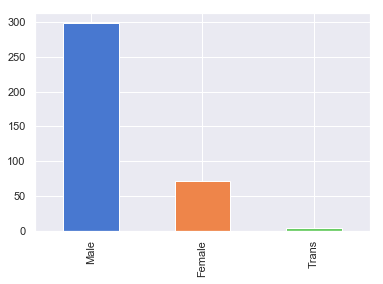

In [34]:
print(RWY["Gender"].value_counts(normalize=True) * 100)
RWY['Gender'].value_counts().plot(kind='bar')

### Countries

In [11]:
RWY['Country'].value_counts()

United States             237
United Kingdom             41
Canada                     22
Germany                    16
Australia                   8
Netherlands                 8
Ireland                     5
Poland                      4
South Africa                3
Bulgaria                    3
France                      3
New Zealand                 3
Croatia                     2
Mexico                      2
Singapore                   2
Austria                     2
Greece                      2
China                       1
Japan                       1
India                       1
Brazil                      1
Bosnia and Herzegovina      1
Hungary                     1
Russia                      1
Uruguay                     1
Finland                     1
Costa Rica                  1
Romania                     1
Name: Country, dtype: int64

### Survey Questions

### I.                       Are you self employed?

What this tells us is that 72% of people in the survey that work remotely are employed by a company.

No     72.826087
Yes    27.173913
Name: self_employed, dtype: float64



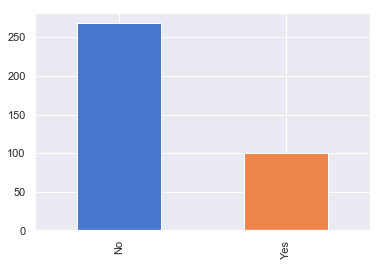

In [12]:
print(RWY["self_employed"].value_counts(normalize=True) * 100) 
print("")
RWY['self_employed'].value_counts().plot(kind='bar')

### II. Do you have a family history of mental illness?

No     60.160428
Yes    39.839572
Name: family_history, dtype: float64



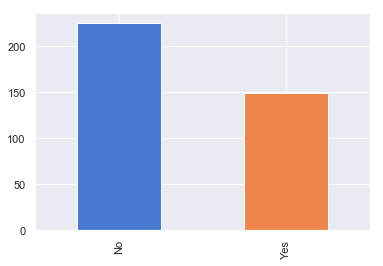

In [13]:
print(RWY["family_history"].value_counts(normalize=True) * 100)
print("")
RWY['family_history'].value_counts().plot(kind='bar')

### III. Have you sought treatment for a mental health condition?

Yes    52.406417
No     47.593583
Name: treatment, dtype: float64



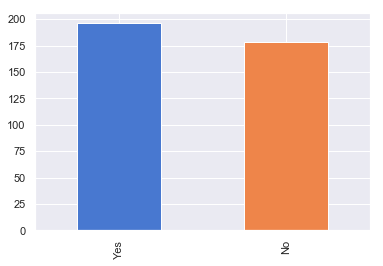

In [14]:
print(RWY["treatment"].value_counts(normalize=True) * 100)
print("")
RWY['treatment'].value_counts().plot(kind='bar')

### IV. How many employees does your company or organization have?

1-5               26.203209
6-25              23.796791
26-100            21.657754
100-500           12.032086
More than 1000    11.764706
500-1000           4.545455
Name: no_employees, dtype: float64



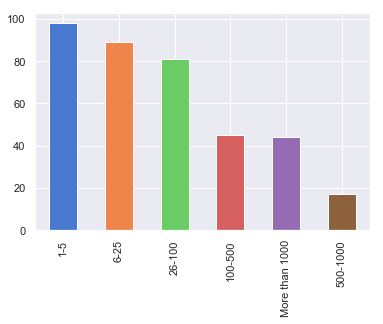

In [15]:
print(RWY["no_employees"].value_counts(normalize=True) * 100)
print("")
RWY['no_employees'].value_counts().plot(kind='bar')

### V. Does your employer provide mental health benefits?

No            35.561497
Don't know    33.689840
Yes           30.748663
Name: benefits, dtype: float64



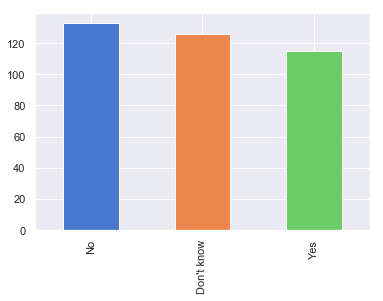

In [16]:
print(RWY["benefits"].value_counts(normalize=True) * 100)
print("")
RWY['benefits'].value_counts().plot(kind='bar')

### VI. Do you know the options for mental health care your employer provides?

No          40.374332
Yes         36.631016
Not sure    22.994652
Name: care_options, dtype: float64



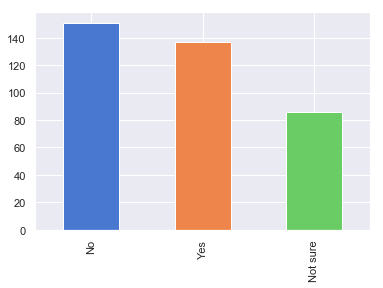

In [17]:
print(RWY["care_options"].value_counts(normalize=True) * 100)
print("")
RWY['care_options'].value_counts().plot(kind='bar')

### VII. Has your employer ever discussed mental health as part of an employee wellness program?

No            68.449198
Don't know    17.647059
Yes           13.903743
Name: wellness_program, dtype: float64



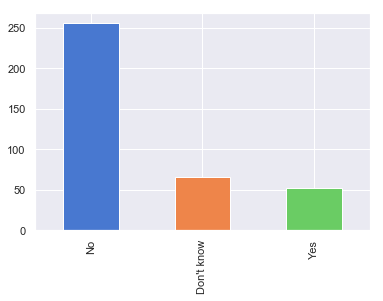

In [18]:
print(RWY["wellness_program"].value_counts(normalize=True) * 100)
print("")
RWY['wellness_program'].value_counts().plot(kind='bar')

### VIII. Does your employer provide resources to learn more about mental health issues and how to seek help?

This could be an important data to look at.

No            53.743316
Don't know    29.679144
Yes           16.577540
Name: seek_help, dtype: float64



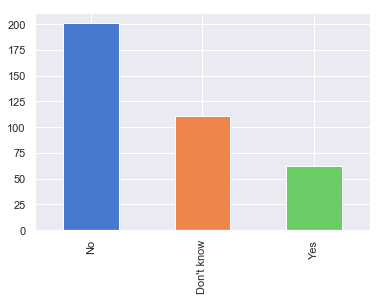

In [19]:
print(RWY["seek_help"].value_counts(normalize=True) * 100)
print("")
RWY['seek_help'].value_counts().plot(kind='bar')

### IX. Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

Don't know    65.775401
Yes           29.411765
No             4.812834
Name: anonymity, dtype: float64



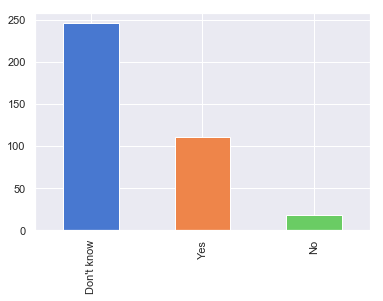

In [20]:
print(RWY["anonymity"].value_counts(normalize=True) * 100)
print("")
RWY['anonymity'].value_counts().plot(kind='bar')

### X. How easy is it for you to take medical leave for a mental health condition?

Don't know            39.304813
Very easy             20.588235
Somewhat easy         20.053476
Very difficult        10.160428
Somewhat difficult     9.893048
Name: leave, dtype: float64



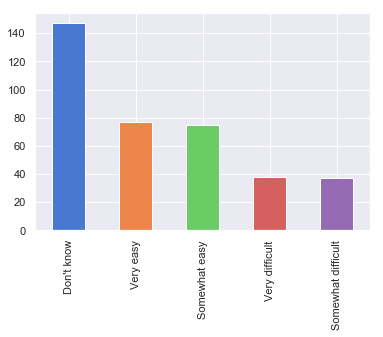

In [21]:
print(RWY["leave"].value_counts(normalize=True) * 100)
print("")
RWY['leave'].value_counts().plot(kind='bar')

### XI. Do you think that discussing a mental health issue with your employer would have negative consequences?

No       41.97861
Maybe    33.42246
Yes      24.59893
Name: mental_health_consequence, dtype: float64



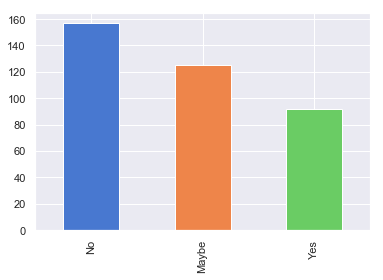

In [22]:
print(RWY["mental_health_consequence"].value_counts(normalize=True) * 100)
print("")
RWY['mental_health_consequence'].value_counts().plot(kind='bar')

### XII. Do you think that discussing a physical health issue with your employer would have negative consequences?

In [ ]:
Very interesting thing to point how No skyrockets to 72%. 

No       72.192513
Maybe    22.994652
Yes       4.812834
Name: phys_health_consequence, dtype: float64



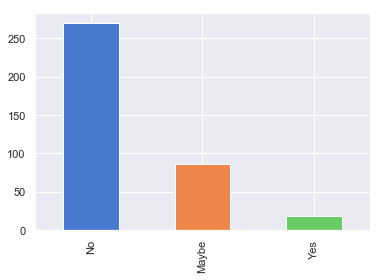

In [23]:
print(RWY["phys_health_consequence"].value_counts(normalize=True) * 100)
print("")
RWY['phys_health_consequence'].value_counts().plot(kind='bar')

### XIII. Would you be willing to discuss a mental health issue with your coworkers?

Some of them    60.695187
Yes             21.925134
No              17.379679
Name: coworkers, dtype: float64



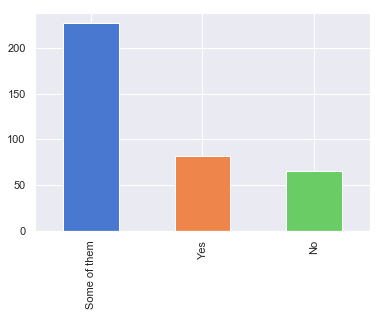

In [24]:
print(RWY["coworkers"].value_counts(normalize=True) * 100)
print("")
RWY["coworkers"].value_counts().plot(kind='bar')

### XIV. Would you be willing to discuss a mental health issue with your direct supervisor(s)?

Yes             43.850267
No              31.283422
Some of them    24.866310
Name: supervisor, dtype: float64



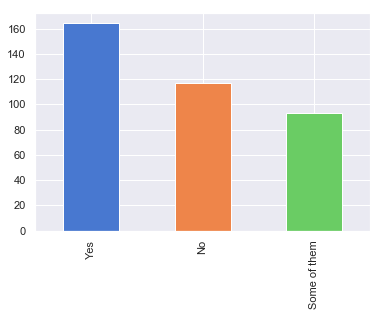

In [25]:
print(RWY["supervisor"].value_counts(normalize=True) * 100)
print("")
RWY["supervisor"].value_counts().plot(kind='bar')

### XV. Would you bring up a mental health issue with a potential employer in an interview?

No       75.401070
Maybe    20.053476
Yes       4.545455
Name: mental_health_interview, dtype: float64



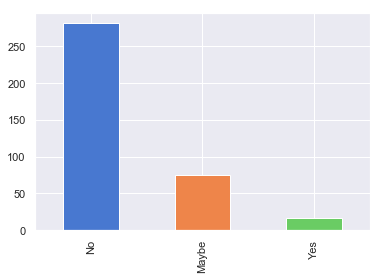

In [26]:
print(RWY["mental_health_interview"].value_counts(normalize=True) * 100)
print("")
RWY["mental_health_interview"].value_counts().plot(kind='bar')

### XVI. Would you bring up a physical health issue with a potential employer in an interview?

Maybe    46.791444
No       36.898396
Yes      16.310160
Name: phys_health_interview, dtype: float64



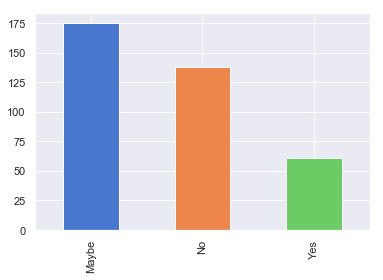

In [27]:
print(RWY["phys_health_interview"].value_counts(normalize=True) * 100)
print("")
RWY["phys_health_interview"].value_counts().plot(kind='bar')

### XVII. Do you feel that your employer takes mental health as seriously as physical health?

Don't know    45.989305
Yes           31.550802
No            22.459893
Name: mental_vs_physical, dtype: float64



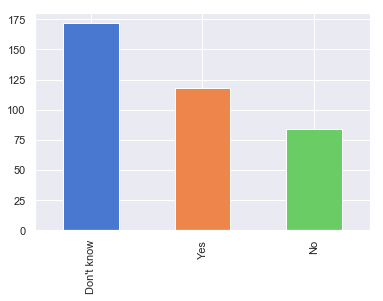

In [28]:
print(RWY["mental_vs_physical"].value_counts(normalize=True) * 100)
print("")
RWY["mental_vs_physical"].value_counts().plot(kind='bar')

### XVIII. Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

No     87.967914
Yes    12.032086
Name: obs_consequence, dtype: float64



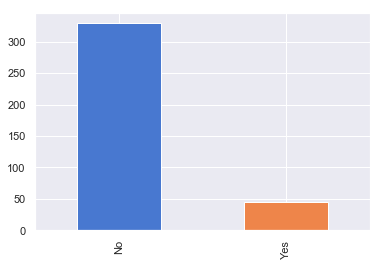

In [29]:
print(RWY["obs_consequence"].value_counts(normalize=True) * 100)
print("")
RWY["obs_consequence"].value_counts().plot(kind='bar')